# Titanic: Machine Learning from Disaster

The following code is my solution for the Titanic starting project to get involved on Kaggle competitions. For further information follow this link: https://www.kaggle.com/c/titanic

In [5]:
# Initial imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the Titanic train dataset
titanic_df = pd.read_csv("data/titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Research Questions
By this analysis we will answer the following questions.

1. Who were the passengers on the Titanic? (Ages, Gendes, Class, etc.)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?
5. What factors helped someone to survive the sinking?

### Question 1. _Who were the passengers on the Titanic? (Ages, Genders, Class, etc.)_

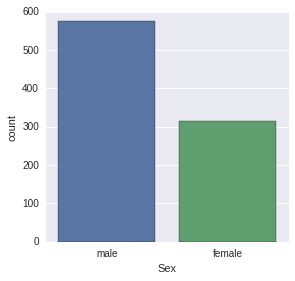

In [12]:
# Distribution by gender
sns.factorplot('Sex', data = titanic_df, kind = 'count')

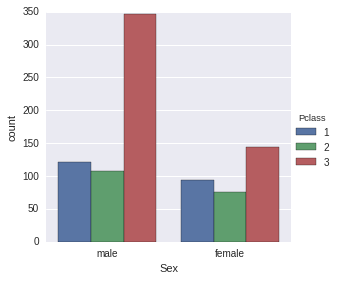

In [15]:
# Gender by passenger class (Pclass)
sns.factorplot('Sex', hue = 'Pclass', kind = 'count', data = titanic_df)

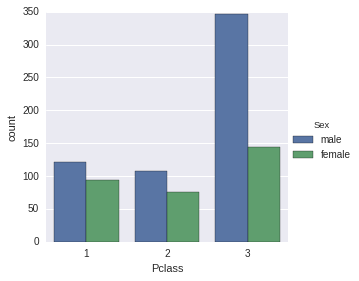

In [17]:
sns.factorplot('Pclass', hue = 'Sex', kind = 'count', data = titanic_df)

In [18]:
# Distribution by male, female or child
def male_female_child(passenger):
    """This function will determine if a passenger is child or not"""
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

## We add a new column to the data frame to define when a person is male, female or child.
## In order to add the new column we will use our function with apply over the columns (that's what axis = 1 means.)
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis = 1)
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


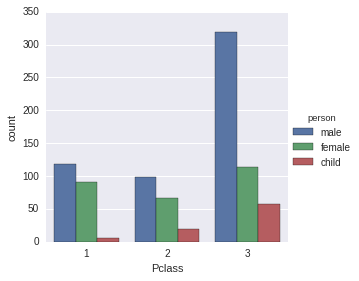

In [19]:
sns.factorplot('Pclass', hue = 'person', kind = 'count', data = titanic_df)

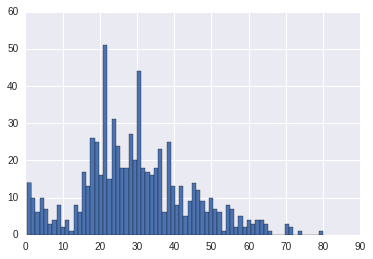

In [20]:
# Distribution by age
titanic_df['Age'].hist(bins = 70)

In [21]:
titanic_df['Age'].mean()

29.69911764705882

In [27]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

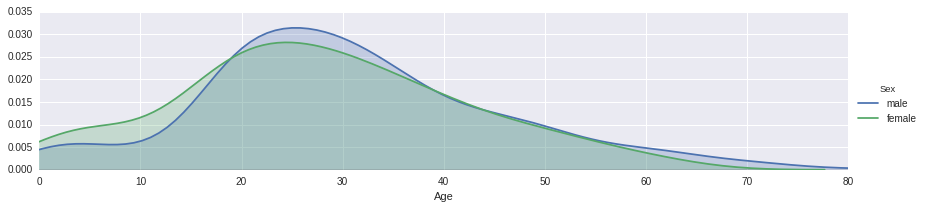

In [28]:
# Kernel Density Estimate (kde) plots about the ages
fig = sns.FacetGrid(titanic_df, hue = 'Sex', aspect = 4) # FacetGrid allows multiple plots.
fig.map(sns.kdeplot, 'Age', shade = True) # Here we define that we will use kdeplots for the facets.
oldest = titanic_df['Age'].max() # Just looking for the oldest passenger to set the X axis top limit.
fig.set(xlim = (0, oldest)) # Define the limits for the X axis.
fig.add_legend()

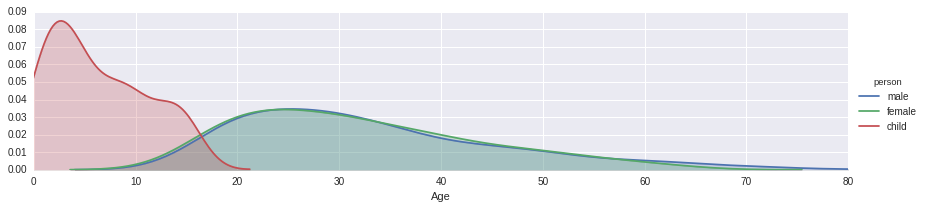

In [29]:
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4) # FacetGrid allows multiple plots.
fig.map(sns.kdeplot, 'Age', shade = True) # Here we define that we will use kdeplots for the facets.
oldest = titanic_df['Age'].max() # Just looking for the oldest passenger to set the X axis top limit.
fig.set(xlim = (0, oldest)) # Define the limits for the X axis.
fig.add_legend()

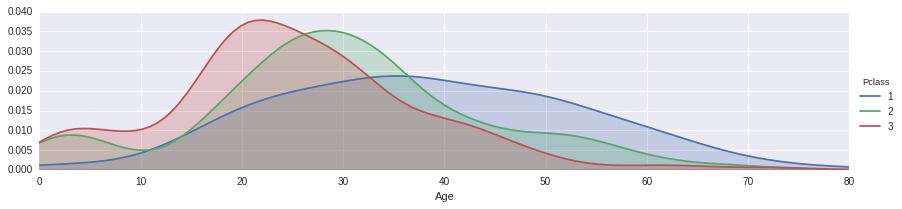

In [30]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4) # FacetGrid allows multiple plots.
fig.map(sns.kdeplot, 'Age', shade = True) # Here we define that we will use kdeplots for the facets.
oldest = titanic_df['Age'].max() # Just looking for the oldest passenger to set the X axis top limit.
fig.set(xlim = (0, oldest)) # Define the limits for the X axis.
fig.add_legend()

### Question 2: What deck were the passengers on and how does that relate to their class?

In [31]:
# Remove the null values
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

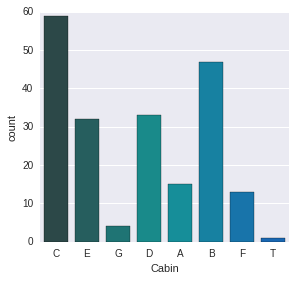

In [51]:
## We will create a data frame with the cabins to analyze how many people were by cabin type.

levels = [level[0] for level in deck] # We take the first leter of each cabin to create a list.
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin_df, palette = 'winter_d', kind = 'count')

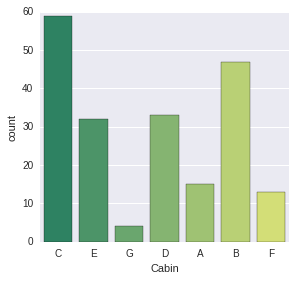

In [53]:
## Since cabin T is a "weird" cabin we will drop ir
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin', data = cabin_df, palette = 'summer', kind = 'count')

### Question 3: Where did the passengers come from?

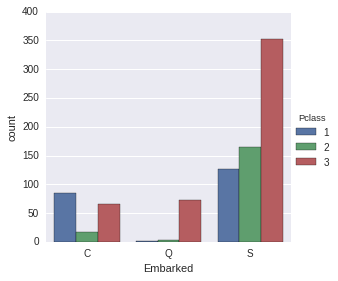

In [55]:
# The 'Embarked' columns indicates the port where people join the Titanic.
# (C = Cherbourg; Q = Queenstown; S = Southampton)
sns.factorplot('Embarked', data = titanic_df, hue = 'Pclass', x_order = ['C', 'Q', 'S'], kind = 'count')